In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('breast-cancer.csv')

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.shape

(569, 32)

In [6]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [7]:
df=df.dropna()
df.drop(["id"], axis=1, inplace=True)
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df['diagnosis'] = df['diagnosis'].replace(['M'], 'Malignant')
df['diagnosis'] = df['diagnosis'].replace(['B'], 'Benign')

In [9]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',title="Comparison of Count Malignant and Benign Patients")

In [10]:
counter = 0

rows,columns = df.shape

dfDuplicates = df.copy()

dfDuplicates.drop_duplicates(inplace=True)

dfDuplicates.reset_index(drop=True,inplace=True)

if dfDuplicates.shape==(rows,columns):
    print('The dataset does not have any duplicates')
else:
    print('Number of duplicates dropped ---> {r-df1.shape[0]}')


The dataset does not have any duplicates


In [11]:
dfOutliers = dfDuplicates.copy()

for i in [i for i in dfOutliers.columns]:
    if dfOutliers[i].nunique()>=12:
        Q1 = dfOutliers[i].quantile(0.15)
        Q3 = dfOutliers[i].quantile(0.85)
        IQR = Q3 - Q1
        dfOutliers = dfOutliers[dfOutliers[i] <= (Q3+(1.5*IQR))]
        dfOutliers = dfOutliers[dfOutliers[i] >= (Q1-(1.5*IQR))]
        
        
        
dfOutliers = dfOutliers.reset_index(drop=True)
display(dfOutliers.head())


print(' Before removal of outliers, The dataset had {} samples.'.format(dfDuplicates.shape[0]))
print(' After removal of outliers, The dataset now has {} samples.'.format(dfOutliers.shape[0]))

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  Malignant        20.57         17.77          132.90     1326.0   
1  Malignant        19.69         21.25          130.00     1203.0   
2  Malignant        20.29         14.34          135.10     1297.0   
3  Malignant        12.45         15.70           82.57      477.1   
4  Malignant        18.25         19.98          119.60     1040.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.08474           0.07864          0.0869              0.07017   
1          0.10960           0.15990          0.1974              0.12790   
2          0.10030           0.13280          0.1980              0.10430   
3          0.12780           0.17000          0.1578              0.08089   
4          0.09463           0.10900          0.1127              0.07400   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.1812  ...         24.99          23.41            158.8   
1         0.2069  ...         23.57          25.53            152.5   
2         0.1809  ...         22.54          16.67            152.2   
3         0.2087  ...         15.47          23.75            103.4   
4         0.1794  ...         22.88          27.66            153.2   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      1956.0            0.1238             0.1866           0.2416   
1      1709.0            0.1444             0.4245           0.4504   
2      1575.0            0.1374             0.2050           0.4000   
3       741.6            0.1791             0.5249           0.5355   
4      1606.0            0.1442             0.2576           0.3784   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.1860          0.2750                  0.08902  
1                0.2430          0.3613                  0.08758  
2                0.1625          0.2364                  0.07678  
3                0.1741          0.3985                  0.12440  
4                0.1932          0.3063                  0.08368  

[5 rows x 31 columns]

 Before removal of outliers, The dataset had 569 samples.
 After removal of outliers, The dataset now has 502 samples.


In [12]:
#Fixing the imbalance using SMOTE Technique

dfFinal = dfOutliers.copy()

print('Original class distribution:')
print(dfFinal['diagnosis'].value_counts())

xf = dfFinal.columns
X = dfFinal.drop(['diagnosis'],axis=1)
Y = dfFinal['diagnosis']

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

dfFinal = pd.DataFrame(X, columns=xf)
dfFinal['diagnosis'] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())
df=dfFinal

Original class distribution:
Benign       337
Malignant    165
Name: diagnosis, dtype: int64

Class distribution after applying SMOTE Technique:
Malignant    337
Benign       337
Name: diagnosis, dtype: int64


In [13]:
df.corr()

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.330319        0.998355   0.993131   
texture_mean                0.330319      1.000000        0.339437   0.333964   
perimeter_mean              0.998355      0.339437        1.000000   0.991648   
area_mean                   0.993131      0.333964        0.991648   1.000000   
smoothness_mean             0.162598      0.019934        0.196915   0.155473   
compactness_mean            0.576560      0.300603        0.619055   0.565233   
concavity_mean              0.749074      0.357636        0.780809   0.747143   
concave points_mean         0.843851      0.326519        0.867445   0.842229   
symmetry_mean               0.175399      0.114548        0.203797   0.172486   
fractal_dimension_mean     -0.326501     -0.039401       -0.284436  -0.313890   
radius_se                   0.718130      0.321813        0.725358   0.740938   
texture_se                 -0.124175      0.393373       -0.120784  -0.099674   
perimeter_se                0.713235      0.343937        0.726171   0.735486   
area_se                     0.835213      0.328913        0.839714   0.857441   
smoothness_se              -0.277228      0.044757       -0.262846  -0.238881   
compactness_se              0.318672      0.274497        0.356330   0.315535   
concavity_se                0.411932      0.278352        0.443003   0.408895   
concave points_se           0.510051      0.217139        0.531944   0.502102   
symmetry_se                -0.210784     -0.022530       -0.202572  -0.191117   
fractal_dimension_se        0.040392      0.146797        0.073799   0.053656   
radius_worst                0.973776      0.358605        0.974865   0.970377   
texture_worst               0.307179      0.920143        0.316330   0.304845   
perimeter_worst             0.969968      0.372312        0.975108   0.966417   
area_worst                  0.957551      0.354526        0.958573   0.967340   
smoothness_worst            0.154232      0.167833        0.185679   0.150351   
compactness_worst           0.484694      0.330035        0.522809   0.463326   
concavity_worst             0.621262      0.349562        0.653177   0.604876   
concave points_worst        0.776550      0.327681        0.799923   0.760222   
symmetry_worst              0.202339      0.152665        0.223636   0.184356   
fractal_dimension_worst     0.101349      0.200815        0.140877   0.092517   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.162598          0.576560        0.749074   
texture_mean                    0.019934          0.300603        0.357636   
perimeter_mean                  0.196915          0.619055        0.780809   
area_mean                       0.155473          0.565233        0.747143   
smoothness_mean                 1.000000          0.664518        0.536095   
compactness_mean                0.664518          1.000000        0.896400   
concavity_mean                  0.536095          0.896400        1.000000   
concave points_mean             0.539531          0.853317        0.948708   
symmetry_mean                   0.564527          0.567678        0.458274   
fractal_dimension_mean          0.618950          0.470435        0.219180   
radius_se                       0.300160          0.540050        0.654773   
texture_se                      0.058160         -0.048732       -0.012486   
perimeter_se                    0.291701          0.591969        0.687107   
area_se                         0.255397          0.562601        0.707042   
smoothness_se                   0.297668          0.034827       -0.011436   
compactness_se                  0.336457          0.758169        0.662003   
concavity_se                    0.323773          0.691721        0.752286   
concave points_se               0.415778          0.651988        0.674664   
symmetry_se                    

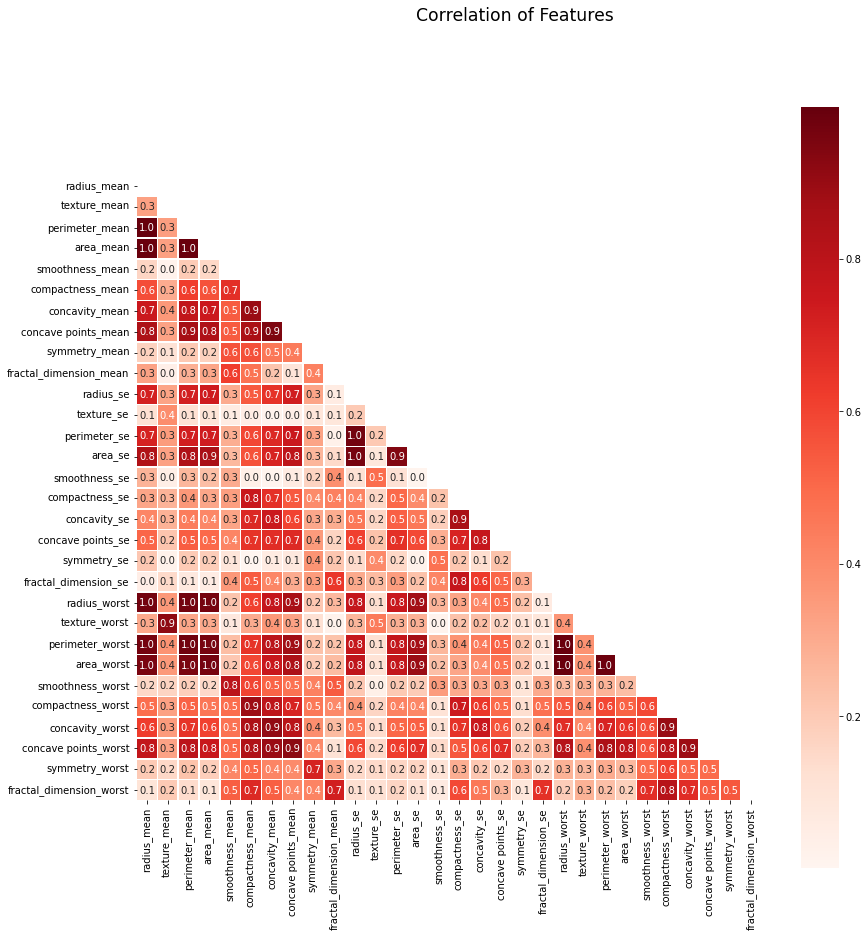

In [14]:
dfCorr = df.corr().abs()
mask = np.triu(np.ones_like(dfCorr, dtype=bool))
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(dfCorr, mask=mask, annot=True,\
    linewidths=0.5, fmt=".1f", ax=ax, cmap="Reds", square=True)
plt.suptitle('Correlation of Features', size='xx-large')
plt.show()

In [15]:
def hist_box_plot(df, col, height=15, width=10):
    fig, axes = plt.subplots(1, 2, figsize=(height, width))
    sns.histplot(ax=axes[0], data = df[col]);
    axes[0].set_title(f'Histogram')
    sns.boxplot(ax=axes[1], data = df[col]);
    axes[1].set_title(f'Boxplot')
    plt.show();

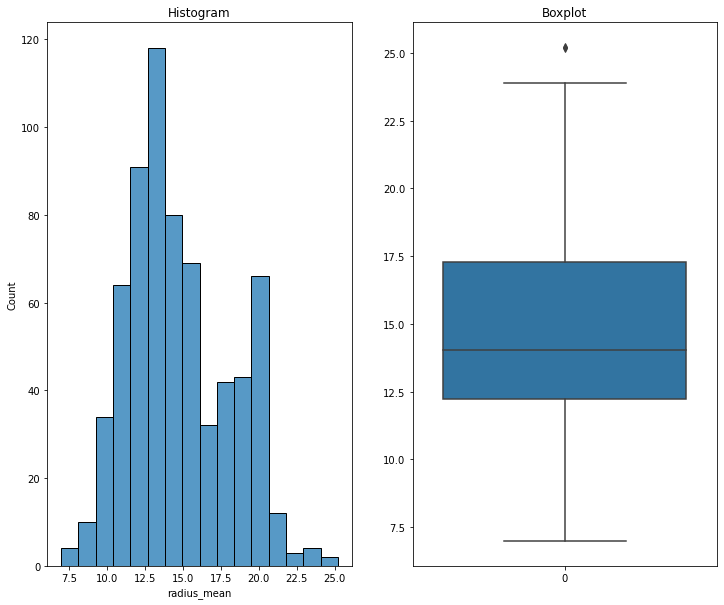

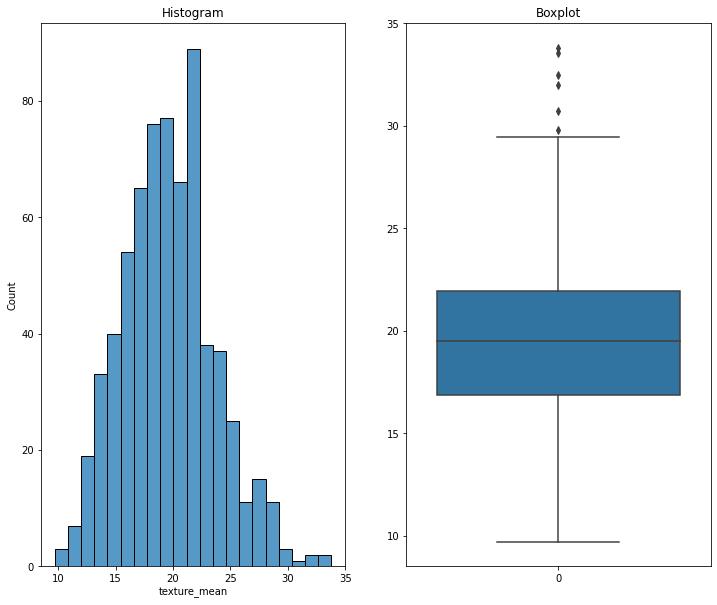

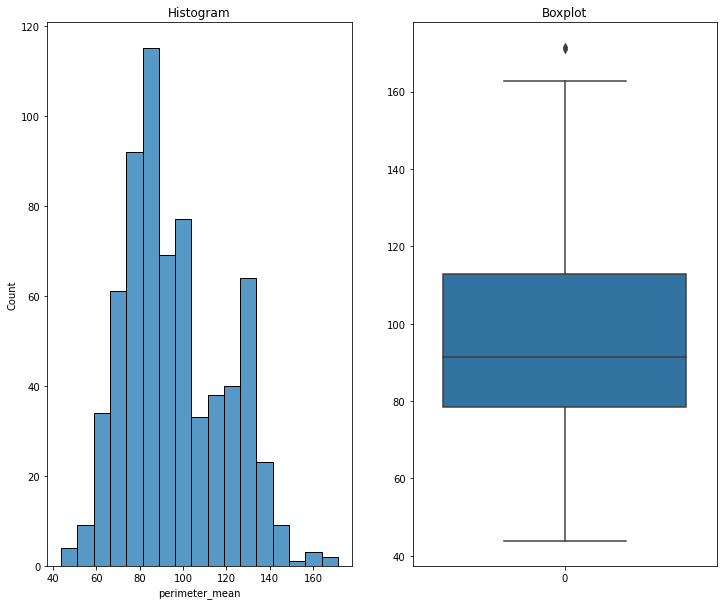

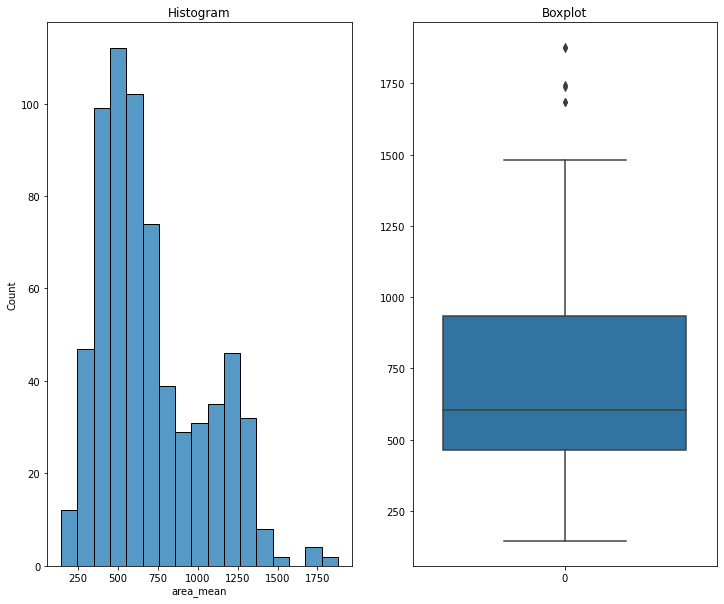

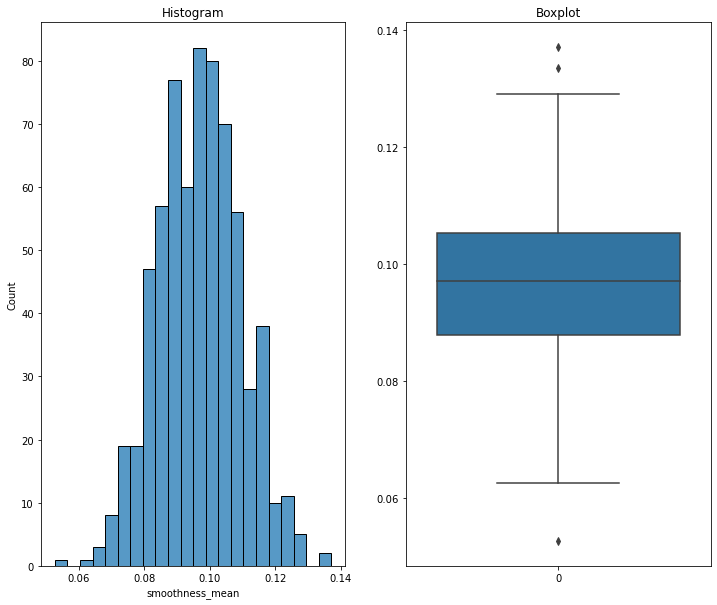

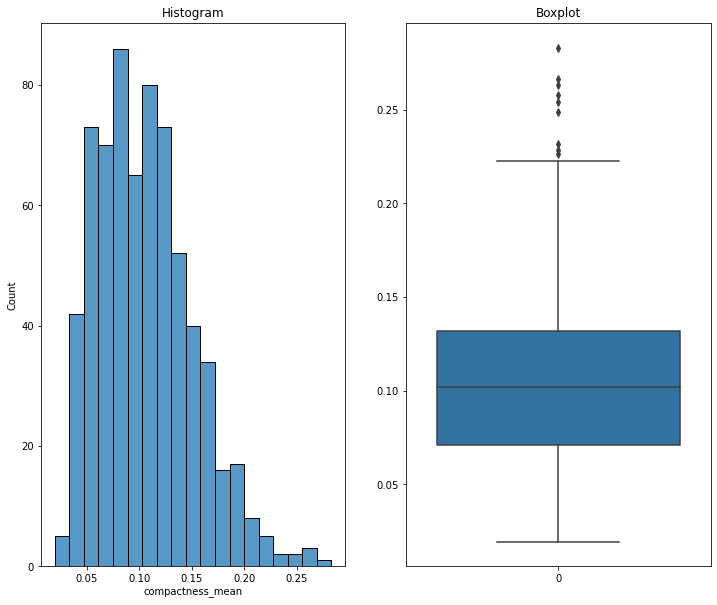

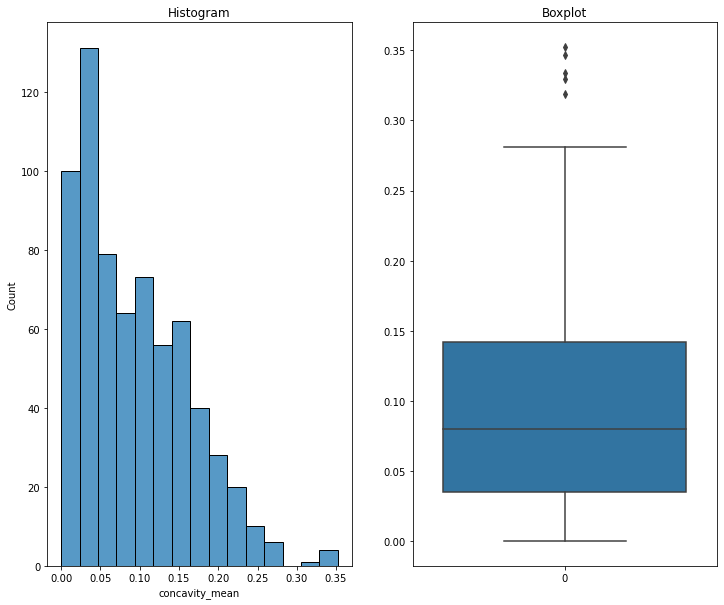

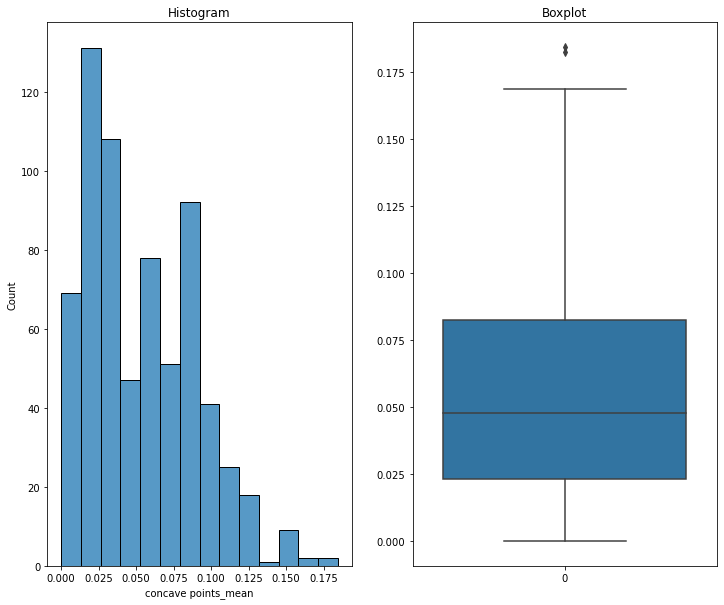

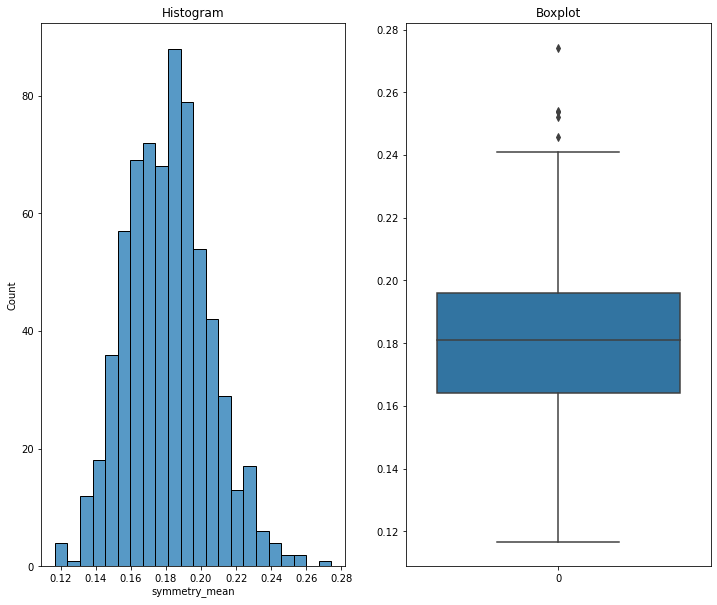

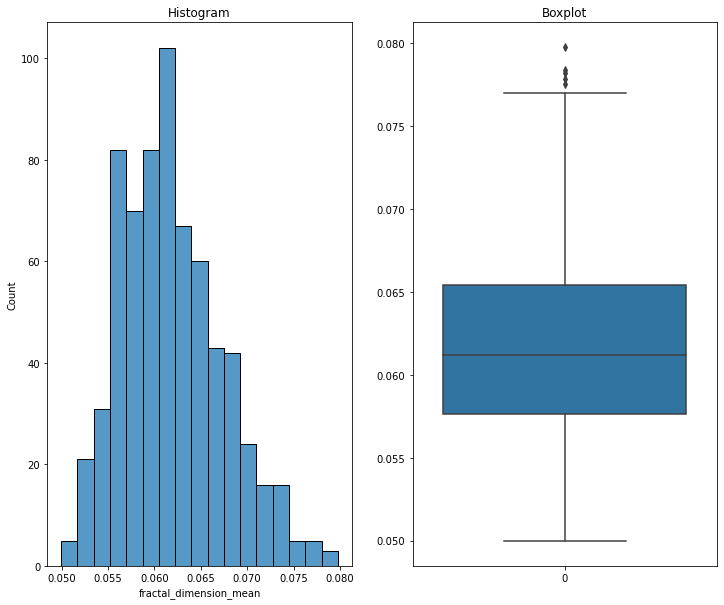

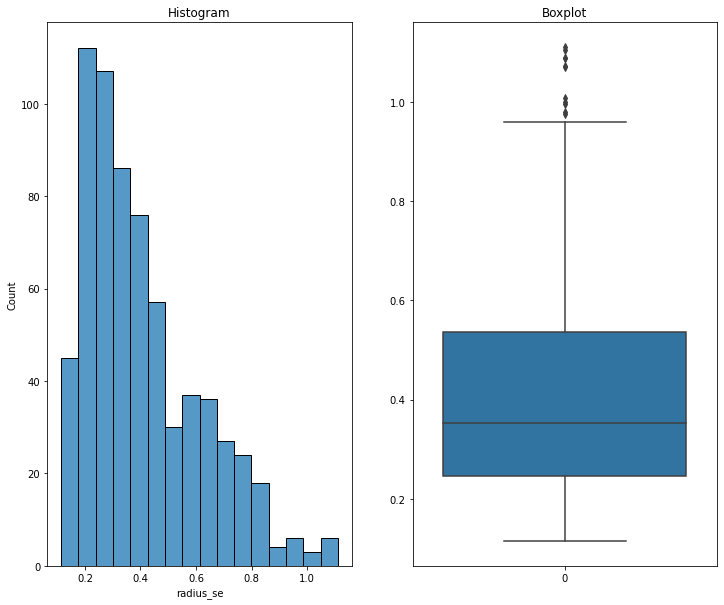

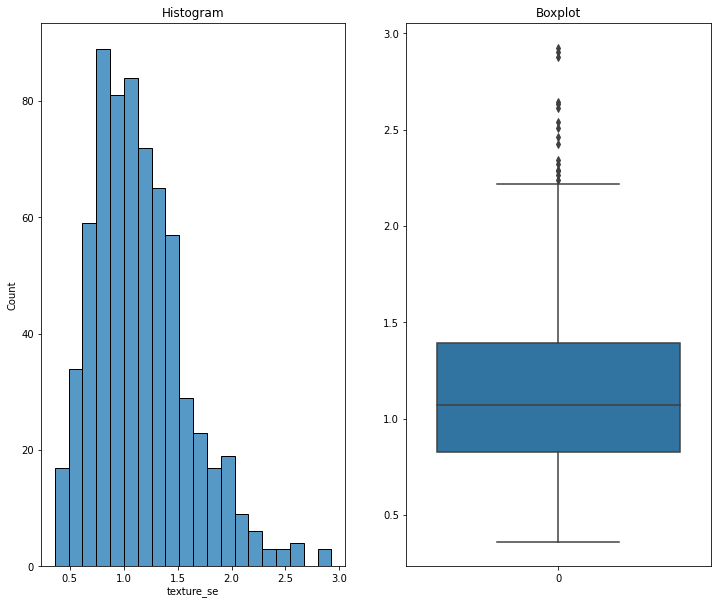

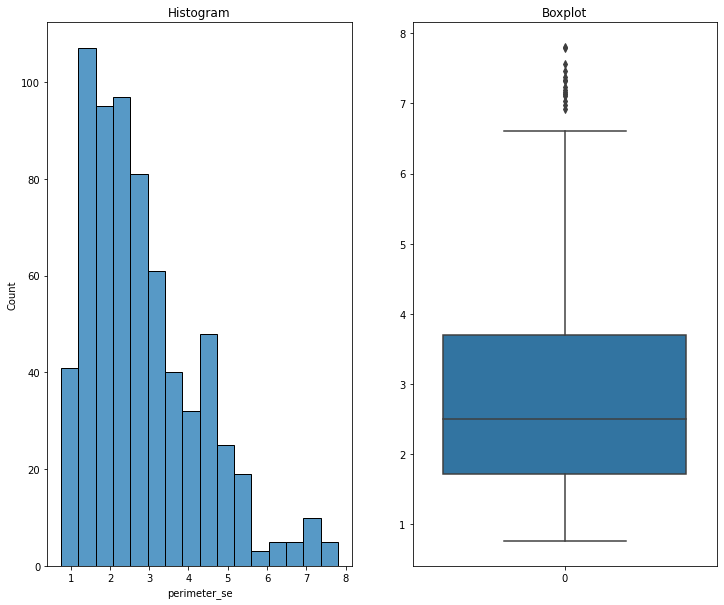

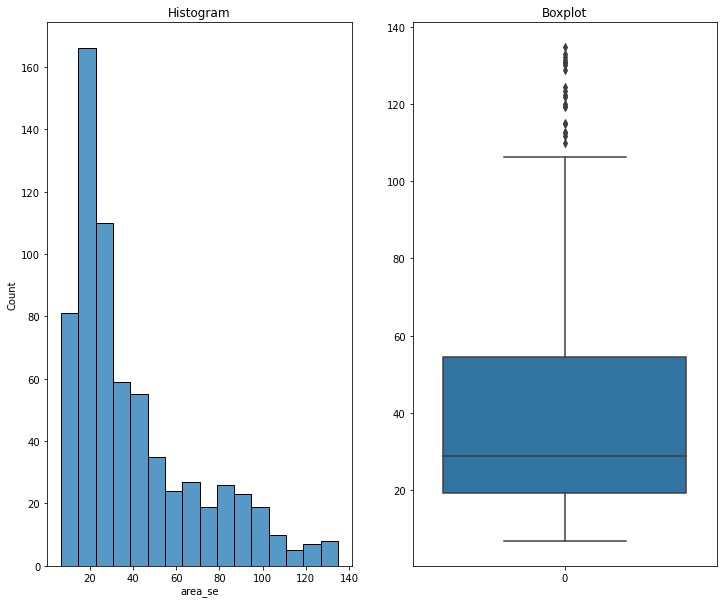

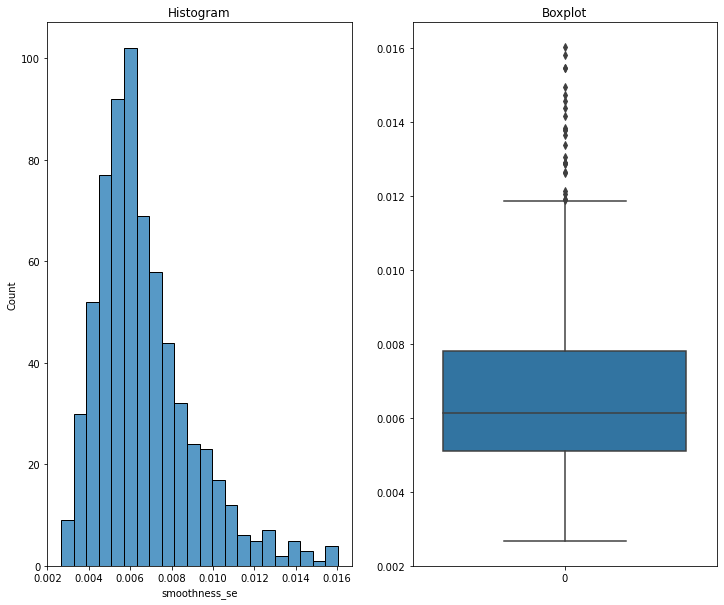

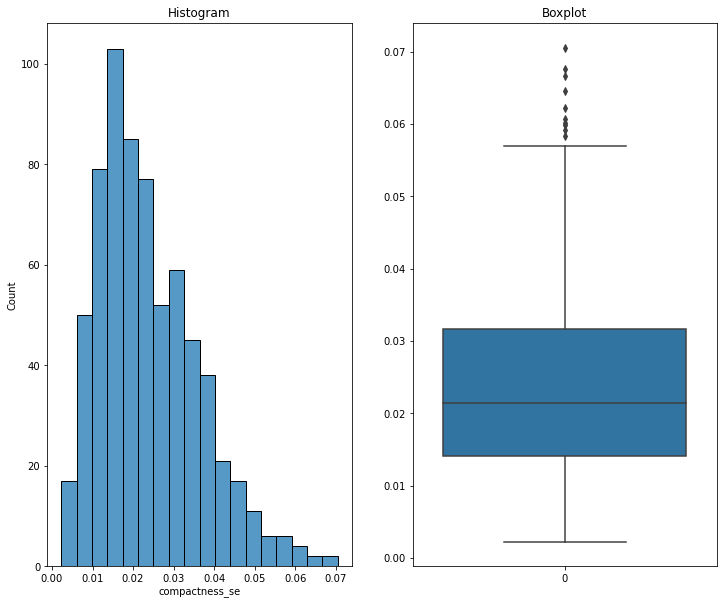

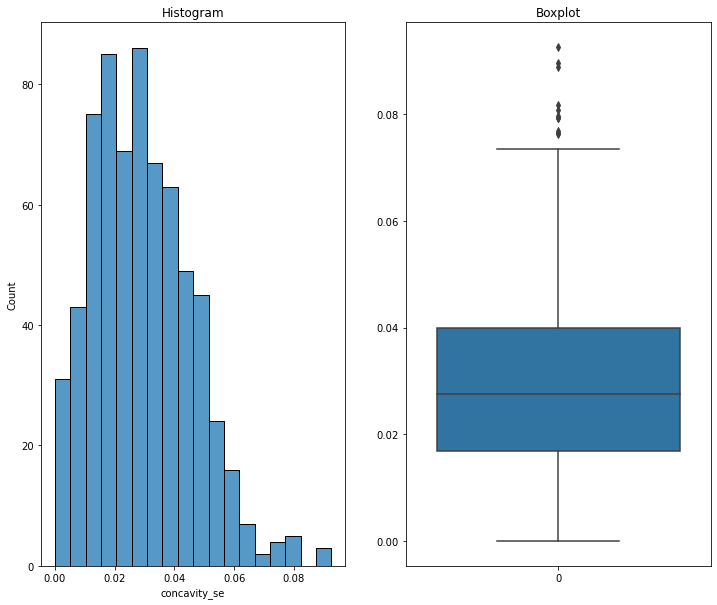

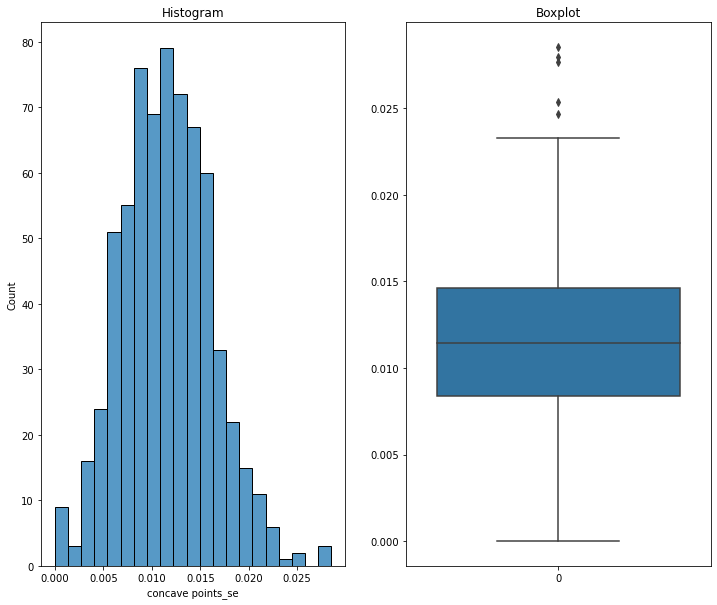

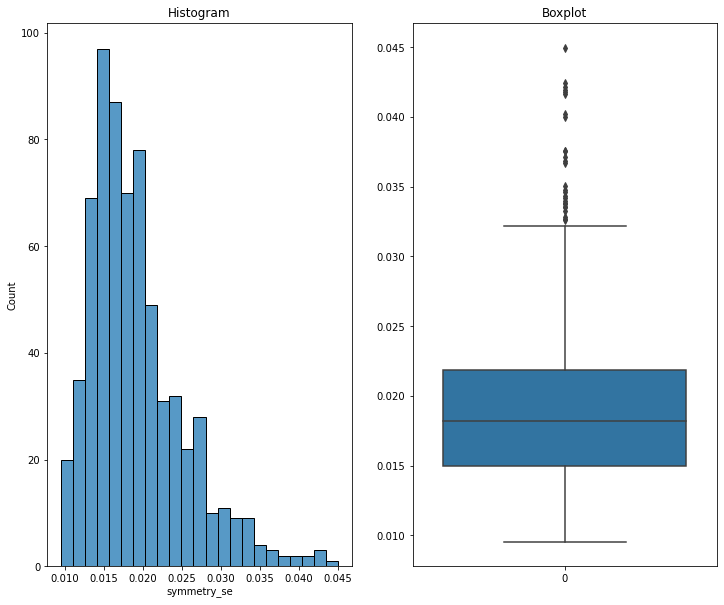

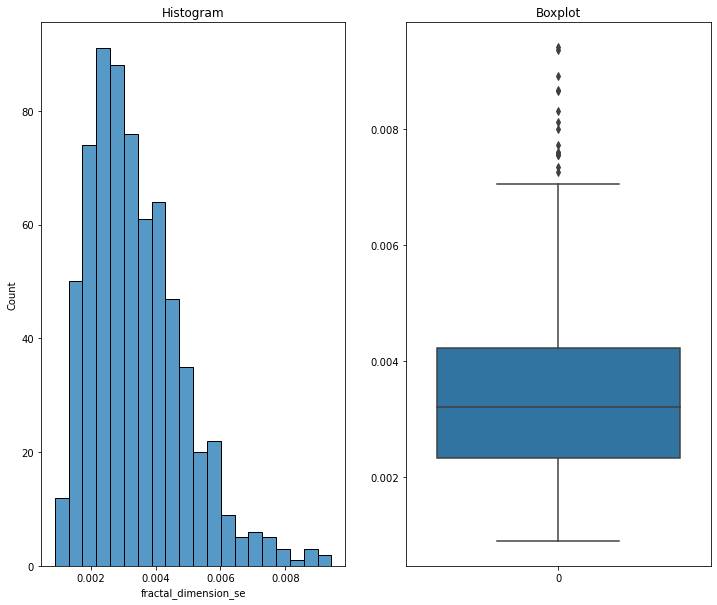

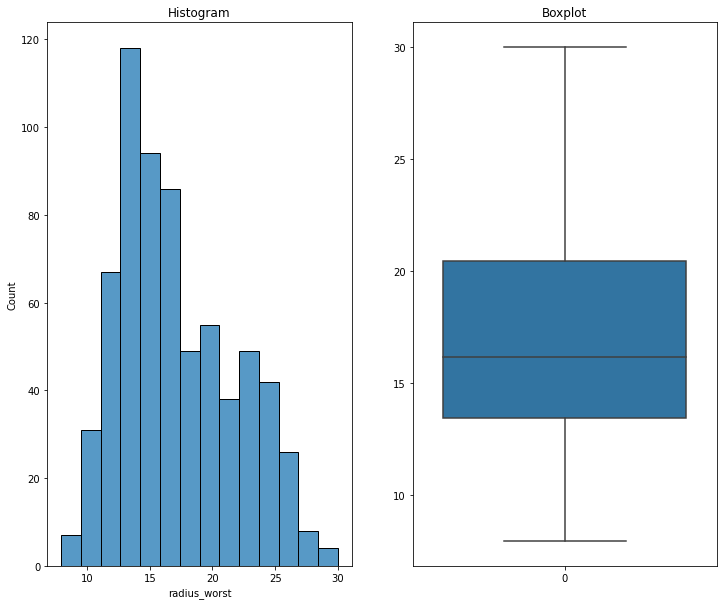

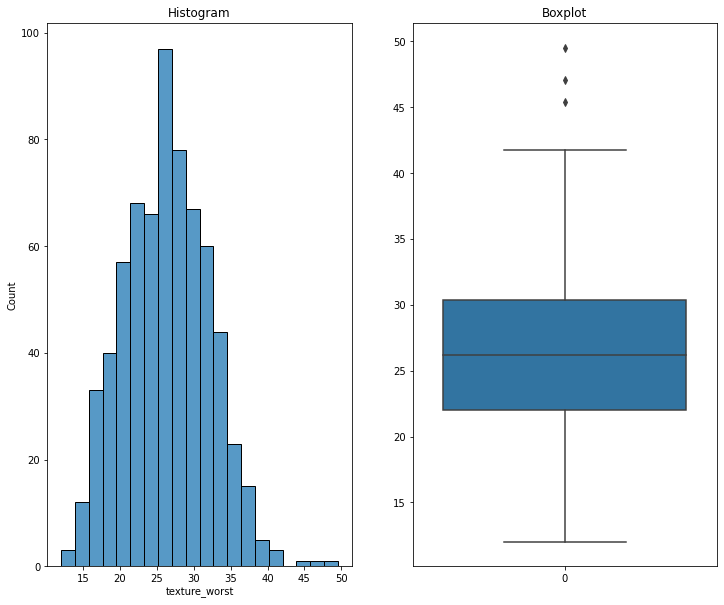

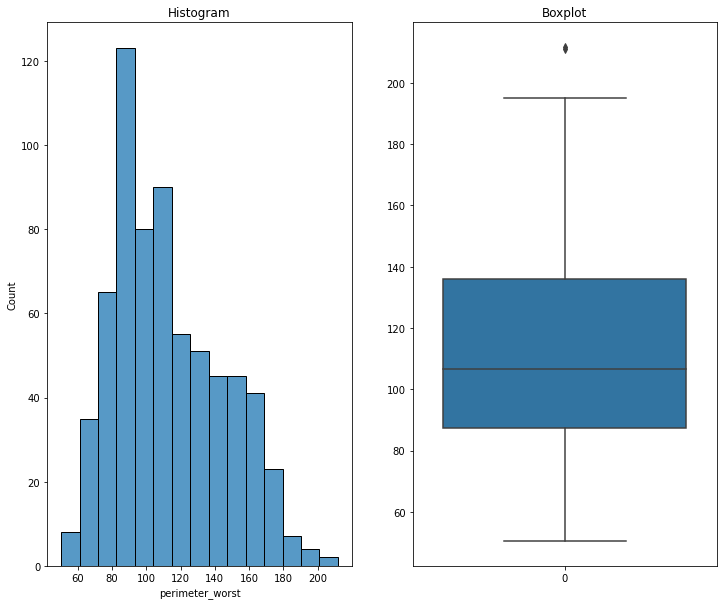

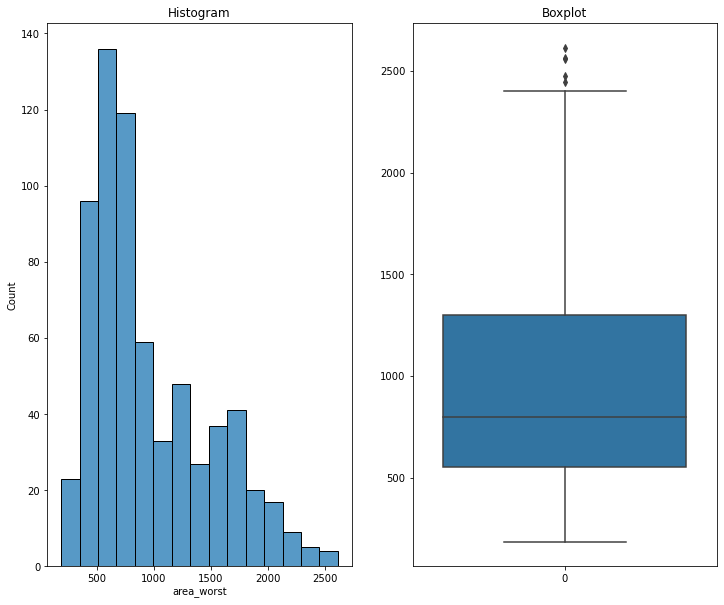

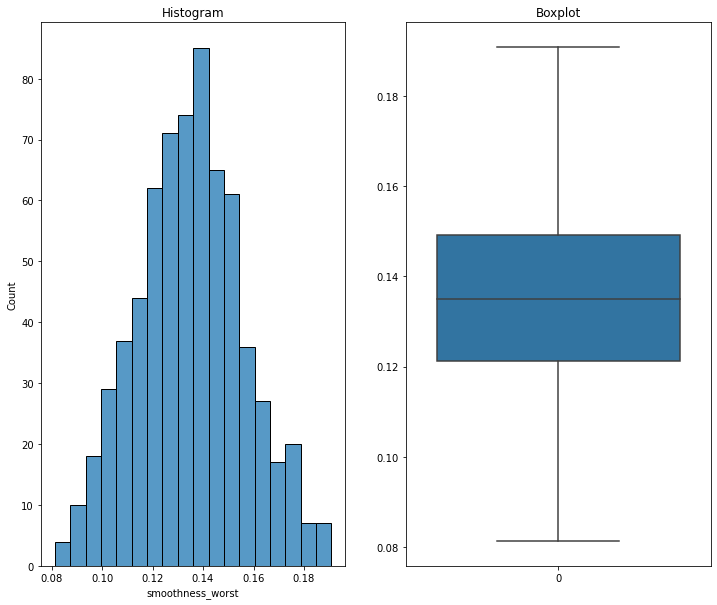

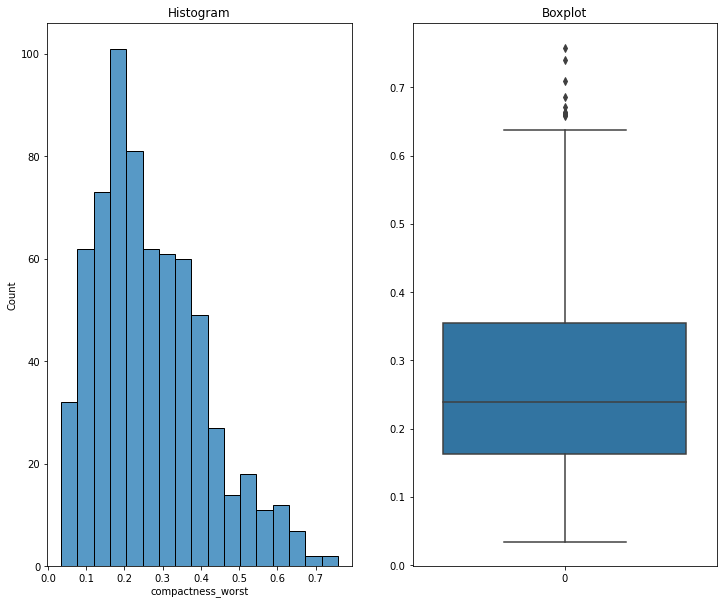

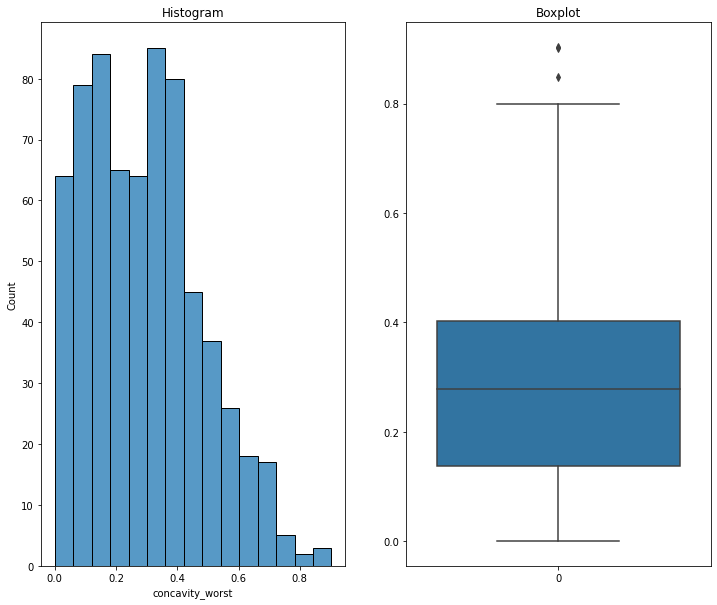

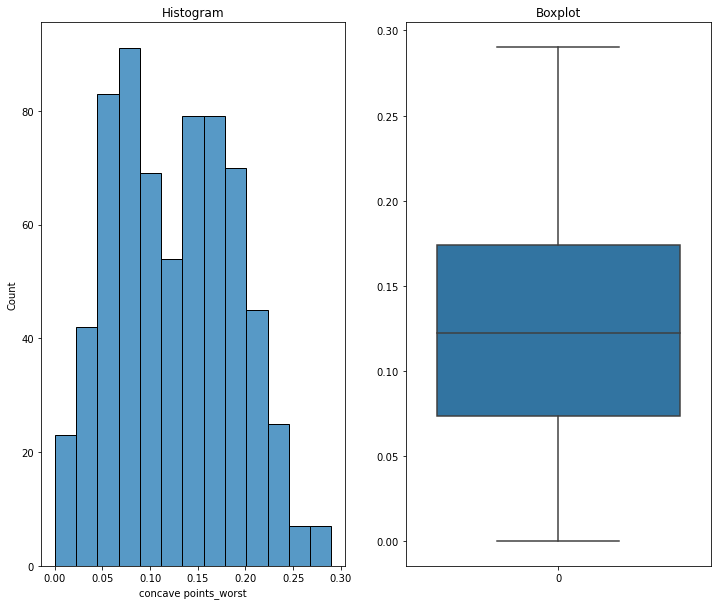

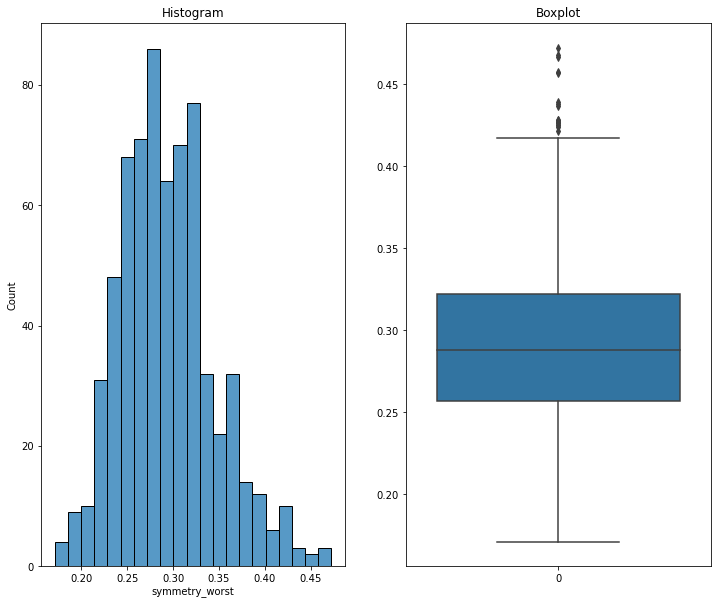

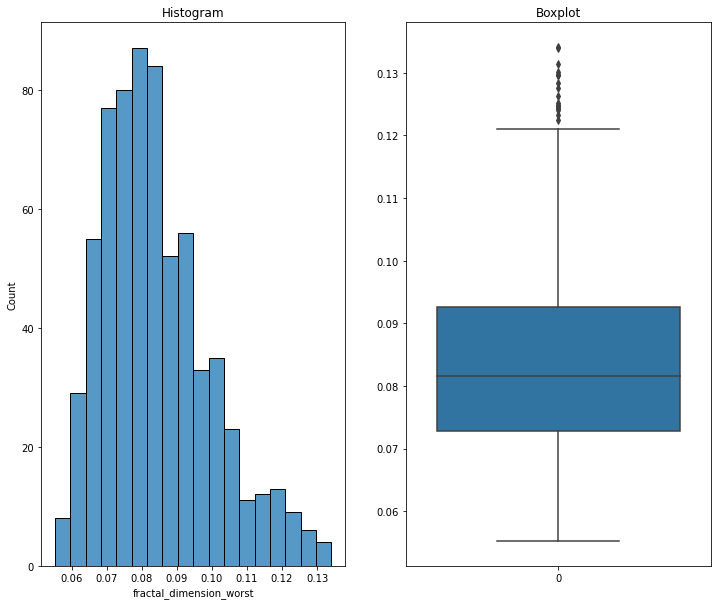

In [16]:
for col in df.iloc[:, 1:].columns:
    
    hist_box_plot(df, col, 12)
    


In [17]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis')

In [18]:
ordinal_encoder = OrdinalEncoder()
dfDiagnosis = df[['diagnosis']]
dfDiagnosisEncoded = ordinal_encoder.fit_transform(dfDiagnosis)


In [19]:
ordinal_encoder.categories_


[array(['Benign', 'Malignant'], dtype=object)]

In [20]:
x = df.drop(['diagnosis'] ,axis=1)
y = df['diagnosis']
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
print(y_test.shape)
print(y.shape)

(203,)
(674,)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics


In [23]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test):
    model.fit(X_train, y_train) 
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = metrics.f1_score(y_test, predictions)
    precision = metrics.precision_score(y_test, predictions)
    recall = metrics.recall_score(y_test, predictions)
    balanced_accuracy = metrics.balanced_accuracy_score(y_test, predictions)
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Balanced Accuracy'])
    return eval_df

In [24]:
lg = LogisticRegression()

results = train_evaluate_model(lg, x_train, y_train, x_test, y_test)
acc_log=results['Accuracy']
results.index = ['Logistic Regression']
results.sort_values(by='Accuracy',ascending=False)

c:\users\nikhil\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy  F1 Score  Precision    Recall  \
Logistic Regression  0.955665  0.953846    0.96875  0.939394   

                     Balanced Accuracy  
Logistic Regression           0.955274

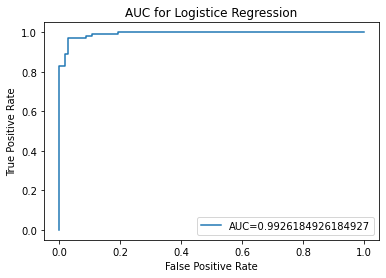

In [25]:
y_pred_proba = lg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('AUC for Logistice Regression')
plt.legend(loc=4)
plt.show()

In [26]:
svc = SVC(probability=True)
svc_results = train_evaluate_model(svc, x_train, y_train, x_test, y_test)
acc_svc=svc_results['Accuracy']

svc_results.index = ['SVC']
results = results.append(svc_results)
results.sort_values(by='Accuracy',ascending=False)

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_2036\1017221498.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Accuracy  F1 Score  Precision    Recall  \
Logistic Regression  0.955665  0.953846   0.968750  0.939394   
SVC                  0.906404  0.898396   0.954545  0.848485   

                     Balanced Accuracy  
Logistic Regression           0.955274  
SVC                           0.905012

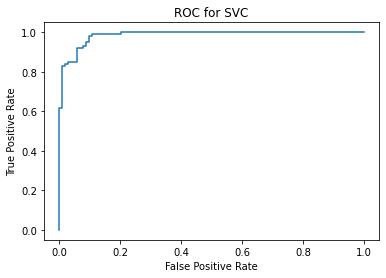

In [27]:
y_pred_proba = svc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs, pos_label=1)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC for SVC')

plt.show()

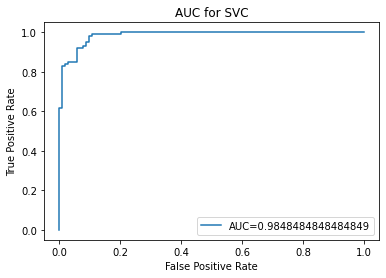

In [28]:
y_pred_proba = svc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('AUC for SVC')

plt.legend(loc=4)
plt.show()

In [29]:



linearSVC = LinearSVC()
linearSVC_results = train_evaluate_model(linearSVC, x_train, y_train, x_test, y_test)
acc_linear_svc=linearSVC_results['Accuracy']

linearSVC_results.index = ['Linear SVC']
results = results.append(linearSVC_results)
results.sort_values(by='Accuracy',ascending=False)

c:\users\nikhil\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_2036\4266503595.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Accuracy  F1 Score  Precision    Recall  \
Logistic Regression  0.955665  0.953846   0.968750  0.939394   
Linear SVC           0.950739  0.948980   0.958763  0.939394   
SVC                  0.906404  0.898396   0.954545  0.848485   

                     Balanced Accuracy  
Logistic Regression           0.955274  
Linear SVC                    0.950466  
SVC                           0.905012

In [30]:

knn = KNeighborsClassifier(n_neighbors = 3)

knn_results = train_evaluate_model(knn, x_train, y_train, x_test, y_test)
acc_knn=knn_results['Accuracy']

knn_results.index = ['KNN']
results = results.append(knn_results)
results.sort_values(by='Accuracy',ascending=False)

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_2036\411097386.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Accuracy  F1 Score  Precision    Recall  \
KNN                  0.970443  0.969388   0.979381  0.959596   
Logistic Regression  0.955665  0.953846   0.968750  0.939394   
Linear SVC           0.950739  0.948980   0.958763  0.939394   
SVC                  0.906404  0.898396   0.954545  0.848485   

                     Balanced Accuracy  
KNN                           0.970183  
Logistic Regression           0.955274  
Linear SVC                    0.950466  
SVC                           0.905012

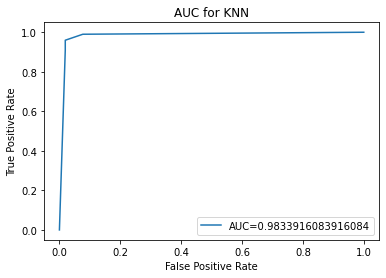

In [31]:
y_pred_proba = knn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('AUC for KNN')

plt.legend(loc=4)
plt.show()

In [32]:
gaussian = GaussianNB()
gaussian_results = train_evaluate_model(gaussian, x_train, y_train, x_test, y_test)
acc_gaussian=gaussian_results['Accuracy']

gaussian_results.index = ['Gaussian']
results = results.append(gaussian_results)
results.sort_values(by='Accuracy',ascending=False)

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_2036\535396478.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Accuracy  F1 Score  Precision    Recall  \
KNN                  0.970443  0.969388   0.979381  0.959596   
Logistic Regression  0.955665  0.953846   0.968750  0.939394   
Linear SVC           0.950739  0.948980   0.958763  0.939394   
Gaussian             0.935961  0.932642   0.957447  0.909091   
SVC                  0.906404  0.898396   0.954545  0.848485   

                     Balanced Accuracy  
KNN                           0.970183  
Logistic Regression           0.955274  
Linear SVC                    0.950466  
Gaussian                      0.935315  
SVC                           0.905012

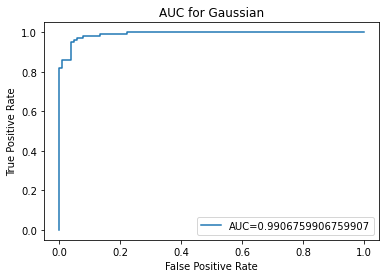

In [33]:
y_pred_proba = gaussian.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('AUC for Gaussian')

plt.legend(loc=4)
plt.show()

In [34]:


perceptron = Perceptron()
perceptron_results = train_evaluate_model(perceptron, x_train, y_train, x_test, y_test)
acc_perceptron=perceptron_results['Accuracy']

perceptron_results.index = ['Perceptron']
results = results.append(perceptron_results)
results.sort_values(by='Accuracy',ascending=False)

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_2036\2420615613.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Accuracy  F1 Score  Precision    Recall  \
KNN                  0.970443  0.969388   0.979381  0.959596   
Logistic Regression  0.955665  0.953846   0.968750  0.939394   
Linear SVC           0.950739  0.948980   0.958763  0.939394   
Gaussian             0.935961  0.932642   0.957447  0.909091   
SVC                  0.906404  0.898396   0.954545  0.848485   
Perceptron           0.906404  0.896175   0.976190  0.828283   

                     Balanced Accuracy  
KNN                           0.970183  
Logistic Regression           0.955274  
Linear SVC                    0.950466  
Gaussian                      0.935315  
SVC                           0.905012  
Perceptron                    0.904526

In [35]:


sgd = SGDClassifier()
sgd_results = train_evaluate_model(sgd, x_train, y_train, x_test, y_test)
acc_sgd=sgd_results['Accuracy']

sgd_results.index = ['SGD']
results = results.append(sgd_results)
results.sort_values(by='Accuracy',ascending=False)

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_2036\1209869535.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Accuracy  F1 Score  Precision    Recall  \
KNN                  0.970443  0.969388   0.979381  0.959596   
Logistic Regression  0.955665  0.953846   0.968750  0.939394   
Linear SVC           0.950739  0.948980   0.958763  0.939394   
Gaussian             0.935961  0.932642   0.957447  0.909091   
SVC                  0.906404  0.898396   0.954545  0.848485   
Perceptron           0.906404  0.896175   0.976190  0.828283   
SGD                  0.852217  0.821429   1.000000  0.696970   

                     Balanced Accuracy  
KNN                           0.970183  
Logistic Regression           0.955274  
Linear SVC                    0.950466  
Gaussian                      0.935315  
SVC                           0.905012  
Perceptron                    0.904526  
SGD                           0.848485

In [36]:


decision_tree = DecisionTreeClassifier()
decision_tree_results = train_evaluate_model(decision_tree, x_train, y_train, x_test, y_test)
acc_decision_tree=decision_tree_results['Accuracy']

decision_tree_results.index = ['Decision Tree']
results = results.append(decision_tree_results)
results.sort_values(by='Accuracy',ascending=False)

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_2036\3091346914.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Accuracy  F1 Score  Precision    Recall  \
KNN                  0.970443  0.969388   0.979381  0.959596   
Logistic Regression  0.955665  0.953846   0.968750  0.939394   
Linear SVC           0.950739  0.948980   0.958763  0.939394   
Gaussian             0.935961  0.932642   0.957447  0.909091   
Decision Tree        0.935961  0.934010   0.938776  0.929293   
SVC                  0.906404  0.898396   0.954545  0.848485   
Perceptron           0.906404  0.896175   0.976190  0.828283   
SGD                  0.852217  0.821429   1.000000  0.696970   

                     Balanced Accuracy  
KNN                           0.970183  
Logistic Regression           0.955274  
Linear SVC                    0.950466  
Gaussian                      0.935315  
Decision Tree                 0.935800  
SVC                           0.905012  
Perceptron                    0.904526  
SGD                           0.848485

In [37]:



random_forest = RandomForestClassifier(n_estimators=100)
random_forest_results = train_evaluate_model(random_forest, x_train, y_train, x_test, y_test)
acc_random_forest=random_forest_results['Accuracy']

random_forest_results.index = ['Random Forest']
results = results.append(random_forest_results)
results.sort_values(by='Accuracy',ascending=False)

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_2036\1130743427.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Accuracy  F1 Score  Precision    Recall  \
Random Forest        0.980296  0.979798   0.979798  0.979798   
KNN                  0.970443  0.969388   0.979381  0.959596   
Logistic Regression  0.955665  0.953846   0.968750  0.939394   
Linear SVC           0.950739  0.948980   0.958763  0.939394   
Gaussian             0.935961  0.932642   0.957447  0.909091   
Decision Tree        0.935961  0.934010   0.938776  0.929293   
SVC                  0.906404  0.898396   0.954545  0.848485   
Perceptron           0.906404  0.896175   0.976190  0.828283   
SGD                  0.852217  0.821429   1.000000  0.696970   

                     Balanced Accuracy  
Random Forest                 0.980284  
KNN                           0.970183  
Logistic Regression           0.955274  
Linear SVC                    0.950466  
Gaussian                      0.935315  
Decision Tree                 0.935800  
SVC                           0.905012  
Perceptron                    0.904526  
SGD                           0.848485

# Sort the models using accuracy

In [38]:
scores=[acc_svc[0], acc_knn[0], acc_log[0], 
              acc_random_forest[0], acc_gaussian[0], acc_perceptron[0], 
              acc_sgd[0], acc_linear_svc[0], acc_decision_tree[0]]
    

In [39]:


models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': scores
})
models.sort_values(by='Score', ascending=False)

Model     Score
3               Random Forest  0.980296
1                         KNN  0.970443
2         Logistic Regression  0.955665
7                  Linear SVC  0.950739
4                 Naive Bayes  0.935961
8               Decision Tree  0.935961
0     Support Vector Machines  0.906404
5                  Perceptron  0.906404
6  Stochastic Gradient Decent  0.852217

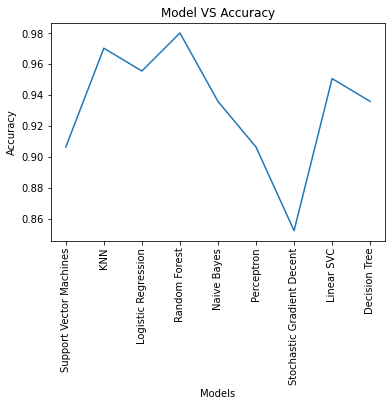

In [40]:
left = [1, 2, 3, 4, 5,6,7,8,9]
  
# heights of bars
accuracies =  [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]
  
# labels for bars
tick_label = ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree']
  
# plotting a bar chart
plt.plot(  tick_label,accuracies)
  
# naming the x-axis
plt.xlabel('Models')
plt.xticks(rotation=90)
# naming the y-axis
plt.ylabel('Accuracy')
# plot title
plt.title('Model VS Accuracy')
  
# function to show the plot
plt.show()

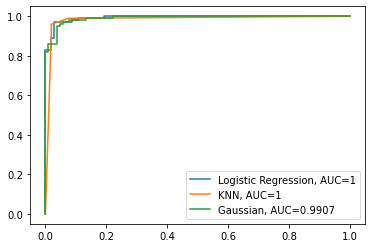

In [41]:
y_pred_proba = lg.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba))
plt.plot(fpr, tpr, label="Logistic Regression, AUC="+str(auc))

y_pred_proba = knn.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba))
plt.plot(fpr, tpr, label="KNN, AUC="+str(auc))



y_pred_proba = gaussian.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr, tpr, label="Gaussian, AUC="+str(auc))
plt.legend()

In [42]:
Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])

In [43]:

def Classification_Summary(pred,pred_prob,i):
    
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(metrics.accuracy_score(y_test, pred),3)*100))
    print('F1 Score = {}%'.format(round(metrics.f1_score(y_test, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',metrics.confusion_matrix(y_test, pred))
    print('\n\033[1mClassification Report:\033[0m\n',metrics.classification_report(y_test, pred))
    
    



<<<----------------------------------- Evaluating 2 ----------------------------------->>>

Accuracy = 98.5%
F1 Score = 98.5%

 Confusiton Matrix:
 [[104   0]
 [  3  96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       104
           1       1.00      0.97      0.98        99

    accuracy                           0.99       203
   macro avg       0.99      0.98      0.99       203
weighted avg       0.99      0.99      0.99       203


Interpreting the output of Random Forest:



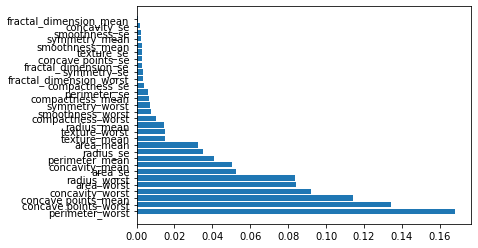

In [44]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(x_train, y_train).best_estimator_
pred = RF.predict(x_test)
pred_prob = RF.predict_proba(x_test)
Classification_Summary(pred,pred_prob,2)

print('\n\033[1mInterpreting the output of Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=x_train.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()
